<a href="https://colab.research.google.com/github/RhysWangJunfei/deep_learning/blob/master/mnist_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [3]:

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid_function(z):
    d = sigmoid_function(z)*(1-sigmoid_function(z))
    return d

def relu_function(z):
    return z*derivative_relu(z)

def derivative_relu(z):
    dz = (z>0)
    return dz

def scaling(dataX):
    min_value=0
    max_value=255
    scaled_dataX = (dataX-min_value)/(max_value-min_value)
    return scaled_dataX

def reverse_norm(scaled_dataX):
    min_value=0
    max_value=255
    dataX = scaled_dataX*((max_value-min_value))+min_value
    return dataX 

def softmax(z):
    idx = z<1e-4
    idz = z>100
    z[idx]=1e-4
    z[idz]=100
    ep = np.exp(z)
    s=ep / np.sum(ep, axis=1).reshape(-1,1)
    return s

def one_hot_encoding(labels):
    encoded_labels = np.zeros((labels.size, 10))
    encoded_labels[np.arange(labels.size),labels] = 1
    return encoded_labels

In [4]:
'''One hidden layer NN'''
'''
h1_size=800
#Neural Network
def define_nn():
    input_size = 784
    hidden1_size = h1_size
    output_size = 10
    network = []
    h1_weights = np.random.rand(input_size,hidden1_size)*0.001
    h1_bias = np.ones([1,hidden1_size])*0.001
    output_weights = np.random.rand(hidden1_size,output_size)*0.001
    network.append(h1_weights)
    network.append(h1_bias)
    network.append(output_weights)
    return network

def foward_pass(batch_x, network):
    z1 = np.dot(batch_x,network[0])+network[1]
    ##a1 = relu_function(z1)
    a1 = sigmoid_function(z1)
    z2 = np.dot(a1,network[2])
    out = softmax(z2)
    forward = []
    forward.append(z1)
    forward.append(a1)
    forward.append(z2)
    forward.append(out)
    return forward

def cost_function(hypothesis, labels):
    cost_step1 = (-1)*labels*np.log(hypothesis)
    cost = np.sum(cost_step1)
    return cost

def backprop(labels, forward, network, batch_x,alpha):
    z1,a1,z2,out = forward
    h1_weights,h1_bias,output_weights = network
    delta_2 = out-labels
    dw1 = np.zeros(h1_weights.shape) 
    dw2 = np.zeros(output_weights.shape) 
    for j in range(10):
        for k in range (h1_size):
            dw_jk=np.dot(a1[:,k].T,delta_2[:,j])/labels.shape[0]
            dw2[k,j]=dw_jk
    aa1 = np.dot(delta_2,output_weights.T)
    #aa2 = (derivative_relu(z1))
    aa2 = (derivative_sigmoid_function(z1))
    delta_1 = aa1*aa2
    db1=np.mean(delta_1,axis=0).reshape(1,-1)
    for j in range(h1_size):
        for k in range (784):
            dw_jk=np.dot(batch_x[:,k].T,delta_1[:,j])/labels.shape[0]
            dw1[k,j]=dw_jk 
    h1_bias = h1_bias-alpha*db1
    output_weights = output_weights-alpha*dw2
    h1_weights = h1_weights-alpha*dw1
    network = [h1_weights,h1_bias,output_weights]
    return network
    '''

In [11]:
'''two hidden layer NN'''
h1_size=512
h2_size=256
#Neural Network
def define_nn():
    input_size = 784
    hidden1_size = h1_size
    hidden2_size = h2_size
    output_size = 10
    network = []
    h1_weights = np.random.rand(input_size,hidden1_size)*0.001
    h2_weights = np.random.rand(hidden1_size, hidden2_size)*0.001
    output_weights = np.random.rand(hidden2_size,output_size)*0.001
    h1_bias = np.ones([1,hidden1_size])*0.001
    h2_bias = np.ones([1,hidden2_size])*0.001
    network.append(h1_weights)
    network.append(h1_bias)
    network.append(h2_weights)
    network.append(h2_bias)
    network.append(output_weights)
    return network

def foward_pass(batch_x, network):
    h1_w, h1_b, h2_w, h2_b, o_w = network
    z1 = np.dot(batch_x,h1_w)+h1_b
    #a1 = relu_function(z1)
    a1 = sigmoid_function(z1)
    z2 = np.dot(a1,h2_w)+h2_b
    #a2 = relu_function(z2)
    a2 = sigmoid_function(z2)
    z3 = np.dot(a2, o_w)
    out = softmax(z3)
    forward = [z1,a1,z2,a2,z3,out]
    return forward

def cost_function(hypothesis, labels):
    cost_step1 = (-1)*labels*np.log(hypothesis)
    cost = np.sum(cost_step1)
    return cost

def backprop(labels, forward, network, batch_x,alpha):
    z1,a1,z2,a2,z3,out = forward
    h1_w, h1_b, h2_w, h2_b, o_w = network

    dw1 = np.zeros(h1_w.shape) 
    dw2 = np.zeros(h2_w.shape) 
    dwo = np.zeros(o_w.shape) 

    delta_3 = out-labels

    #claculate gradient w.r.t w3
    for j in range(10):
        for k in range (h2_size):
            dw_jk=np.dot(a2[:,k].T,delta_3[:,j])/labels.shape[0]
            dwo[k,j]=dw_jk
    aa1 = np.dot(delta_3,o_w.T)
    #aa2 = (derivative_relu(z2))
    aa2 = (derivative_sigmoid_function(z2))
    delta_2 = aa1*aa2
    db2=np.mean(delta_2,axis=0).reshape(1,-1)

    #claculate gradient w.r.t w2
    for j in range(h2_size):
        for k in range (h1_size):
            dw_jk=np.dot(a1[:,k].T,delta_2[:,j])/labels.shape[0]
            dw2[k,j]=dw_jk 
    aa1 = np.dot(delta_2,h2_w.T)
    #aa2 = (derivative_relu(z1))
    aa2 = (derivative_sigmoid_function(z1))
    delta_1 = aa1*aa2
    db1=np.mean(delta_1,axis=0).reshape(1,-1)

    #claculate gradient w.r.t w1
    for j in range(h1_size):
        for k in range (784):
            dw_jk=np.dot(batch_x[:,k].T,delta_1[:,j])/labels.shape[0]
            dw1[k,j]=dw_jk 

    h1_b = h1_b-alpha*db1
    h2_b = h2_b-alpha*db2
    o_w = o_w-alpha*dwo
    h1_w = h1_w-alpha*dw1
    h2_w = h2_w-alpha*dw2
    network = [h1_w, h1_b, h2_w, h2_b, o_w]
    return network

In [16]:
'''three hidden layer NN'''
h1_size=256
h2_size=128
h3_size=64

#Neural Network
def define_nn():
    input_size = 784
    hidden1_size = h1_size
    hidden2_size = h2_size
    hidden3_size = h3_size
    output_size = 10
    network = []
    h1_w = np.random.rand(input_size,hidden1_size)*0.001
    h2_w = np.random.rand(hidden1_size, hidden2_size)*0.001
    h3_w = np.random.rand(hidden2_size, hidden3_size)*0.001
    o_w = np.random.rand(hidden3_size,output_size)*0.001
    h1_b = np.ones([1,hidden1_size])*0.001
    h2_b = np.ones([1,hidden2_size])*0.001
    h3_b = np.ones([1,hidden3_size])*0.001
    network=[h1_w, h1_b, h2_w, h2_b, h3_w, h3_b, o_w]
    return network

def foward_pass(batch_x, network):
    h1_w, h1_b, h2_w, h2_b, h3_w, h3_b, o_w = network
    z1 = np.dot(batch_x,h1_w)+h1_b
    a1 = relu_function(z1)
    z2 = np.dot(a1,h2_w)+h2_b
    a2 = relu_function(z2)
    z3 = np.dot(a2, h3_w)+h3_b
    a3 = relu_function(z3)
    z4 = np.dot(a3, o_w)
    out = softmax(z4)
    forward = [z1,a1,z2,a2,z3,a3,z4,out]
    return forward

def cost_function(hypothesis, labels):
    cost_step1 = (-1)*labels*np.log(hypothesis)
    cost = np.sum(cost_step1)
    return cost

def backprop(labels, forward, network, batch_x,alpha):
    z1,a1,z2,a2,z3,a3,z4,out = forward
    h1_w, h1_b, h2_w, h2_b, h3_w, h3_b, o_w = network

    dw1 = np.zeros(h1_w.shape) 
    dw2 = np.zeros(h2_w.shape)
    dw3 = np.zeros(h3_w.shape) 
    dwo = np.zeros(o_w.shape) 

    delta_4 = out-labels

    #claculate gradient w.r.t w4
    for j in range(10):
        for k in range (h3_size):
            dw_jk=np.dot(a3[:,k].T,delta_4[:,j])
            dwo[k,j]=dw_jk
    aa1 = np.dot(delta_4,o_w.T)
    aa2 = (derivative_relu(z3))
    delta_3 = aa1*aa2
    db3=np.mean(delta_3,axis=0).reshape(1,-1)

    #claculate gradient w.r.t w3
    for j in range(h3_size):
        for k in range (h2_size):
            dw_jk=np.dot(a2[:,k].T,delta_3[:,j])
            dw3[k,j]=dw_jk 
    aa1 = np.dot(delta_3,h3_w.T)
    aa2 = (derivative_relu(z2))
    delta_2 = aa1*aa2
    db2=np.mean(delta_2,axis=0).reshape(1,-1)

    #claculate gradient w.r.t w2
    for j in range(h2_size):
        for k in range (h1_size):
            dw_jk=np.dot(a1[:,k].T,delta_2[:,j])
            dw2[k,j]=dw_jk 
    aa1 = np.dot(delta_2,h2_w.T)
    aa2 = (derivative_relu(z1))
    delta_1 = aa1*aa2
    db1=np.mean(delta_1,axis=0).reshape(1,-1)

    #claculate gradient w.r.t w1
    for j in range(h1_size):
        for k in range (784):
            dw_jk=np.dot(batch_x[:,k].T,delta_1[:,j])
            dw1[k,j]=dw_jk 

    h1_b = h1_b-alpha*db1
    h2_b = h2_b-alpha*db2
    h3_b = h3_b-alpha*db3
    o_w = o_w-alpha*dwo
    h1_w = h1_w-alpha*dw1
    h2_w = h2_w-alpha*dw2
    h3_w = h3_w-alpha*dw3
    network = [h1_w, h1_b, h2_w, h2_b,h3_w, h3_b, o_w]
    return network

In [5]:
x_train=x_train.reshape([-1,784])
x_test = x_test.reshape([-1,784])
x_train=scaling(x_train)
x_test=scaling(x_test)
y_train = one_hot_encoding(y_train)

In [12]:
#initialize the weights
network = define_nn()
loss_list_nn1=[]

In [22]:
alpha=0.1
batch_size=512
ids = np.arange(0,y_train.shape[0])
for i in range(3000):
    np.random.shuffle(ids)
    batch_ids = ids[0:batch_size]
    batch_x = x_train[batch_ids,:].reshape([-1,784])
    batch_y = y_train[batch_ids,:].reshape([-1,10])
    forward = foward_pass(batch_x, network)
    cost = cost_function(forward[-1],batch_y)
    network = backprop(batch_y, forward, network, batch_x,alpha)
    loss_list_nn1.append(cost)
    out_label = np.argmax(forward[-1],axis=1)
    exp_label = np.argmax(batch_y,axis=1)
    #np.sum(out_label==exp_label)
    acc=np.sum(out_label==exp_label)/batch_size
    test_h = foward_pass(x_test, network)[-1]
    test_h_label = np.argmax(test_h,axis=1)
    test_correct = np.sum((test_h_label==y_test))
    test_acc = test_correct/10000
    
    print('Here we are at the '+str(i)+'-th iteration, the cost is '+str(cost)+\
          ',and the accuracy is: '+str(acc)+', test_acc='+str(test_acc))

Here we are at the 0-th iteration, the cost is 191.7650932322672,and the accuracy is: 0.87109375, test_acc=0.8899
Here we are at the 1-th iteration, the cost is 196.72418995936184,and the accuracy is: 0.880859375, test_acc=0.8897
Here we are at the 2-th iteration, the cost is 202.32347319148542,and the accuracy is: 0.892578125, test_acc=0.8897
Here we are at the 3-th iteration, the cost is 183.22765287005245,and the accuracy is: 0.896484375, test_acc=0.8903
Here we are at the 4-th iteration, the cost is 202.03326809145193,and the accuracy is: 0.876953125, test_acc=0.891
Here we are at the 5-th iteration, the cost is 182.89000566536248,and the accuracy is: 0.8828125, test_acc=0.8912
Here we are at the 6-th iteration, the cost is 164.52031441135495,and the accuracy is: 0.916015625, test_acc=0.8913
Here we are at the 7-th iteration, the cost is 190.52114634934566,and the accuracy is: 0.884765625, test_acc=0.8905
Here we are at the 8-th iteration, the cost is 212.36824773825484,and the acc

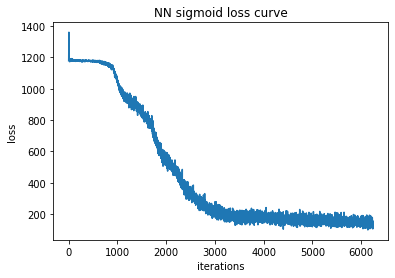

In [23]:
import matplotlib.pyplot as plt
plt.plot(loss_list_nn1)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('NN sigmoid loss curve')
plt.show()